In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from mglearn.plots import plot_2d_separator






/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


##Wine Data

In [9]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [0]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [11]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


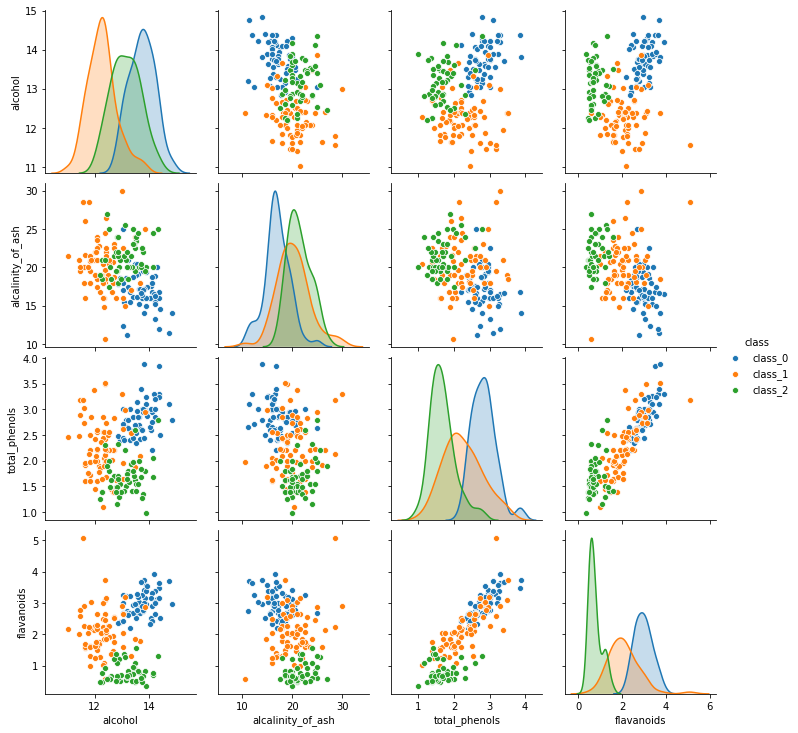

In [12]:
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()
## 일부 특징값의 분포와 상관관계를 보는 히스토그램과 스캐터플롯
## 선형으로는 구분하기 힘들 다는 것을 느낌.

## 1. SVM

In [0]:
from sklearn.metrics import classification_report, confusion_matrix  



In [0]:
x_train, x_test, y_train, y_test = train_test_split( wine.data, wine.target, test_size=0.3)
# test size 비율 0.3으로 했을 때 가정(꼭 0.1로 하라는 말씀이 없어서 test size= 0.3으로 했습니다.)

In [15]:
# 그냥 svm에 적용했을 때 

svc = SVC(random_state=0) # default: C=1, kernel='rbf', gamme='auto'

svc.fit(x_train, y_train) 



train_score = svc.score(x_train, y_train)

test_score = svc.score(x_test, y_test)



print('{:.3f}'.format(train_score))

# 1.000



print('{:.3f}'.format(test_score))

# 0.422

0.677
0.685


## 전처리 하기

In [0]:
from sklearn import preprocessing

## MinMax로 데이터 scale하기
wine.data = preprocessing.MinMaxScaler().fit_transform(wine.data)
x_train, x_test, y_train, y_test = train_test_split( wine.data, wine.target, test_size=0.3)



In [27]:
##cross-validation으로 부터 tuning한 Hyper-parameter 찾기
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,100,10,0.1,0.01,0.001], 'gamma': [1,100,10,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=10)
## 찾은 Hyper-parameter를 training하기
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 100, 10, 0.1, 0.01, 0.001],
                         'gamma': [1, 100, 10, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
## optimal Hyper-parameter 찾은 것을 보여주고 optimal Hyper-parameter의 최고 점수 보여주기
print(grid.best_estimator_)
print(grid.best_score_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.9833333333333334


In [0]:
#from sklearn.model_selection import cross_val_score
#score = cross_val_score(grid, x_train, y_train, scoring='accuracy', cv=5)



In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 모델 평가하기
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(accuracy_score(y_test, grid_predictions))



[[18  0  0]
 [ 1 21  0]
 [ 0  0 14]]
0.9814814814814815


In [31]:
## 평가하기 위한 지표 accuracy와 f1-score 구하기
print(classification_report(grid_predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [43]:
## ROC curve 를 통한 AUC score 구하기
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

a1=multiclass_roc_auc_score(y_test,grid_predictions)
a2=(0.97+0.98+1.0)/3
a3=accuracy_score(y_test, grid_predictions)

## SVM model의 accuracy, f1- score, auc score 나타낸 결과
print('SVM model roc curve score :' ,a1)
print('SVM model f1-score :' ,a2)
print('SVM model accuracy :' ,a3)


SVM model roc curve score : 0.9877946127946128
SVM model f1-score : 0.9833333333333334
SVM model accuracy : 0.9814814814814815


F1 score는 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현할 수 있다.(imbalance의 척도)

AUC(Area Under Curve)는 최대값은 1이며 좋은 모델(즉, Fall-out에 비해 Recall 값이 클수록) 1에 가까운 값(classification 전반적인 성능 평가)

## 2. KNN classification

In [44]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from mglearn.plots import plot_2d_separator
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split



wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [45]:
## wine data feature 종류
for i in range(len(wine.feature_names)):

    print('{}:{}'.format(i, wine.feature_names[i]))

0:alcohol
1:malic_acid
2:ash
3:alcalinity_of_ash
4:magnesium
5:total_phenols
6:flavanoids
7:nonflavanoid_phenols
8:proanthocyanins
9:color_intensity
10:hue
11:od280/od315_of_diluted_wines
12:proline


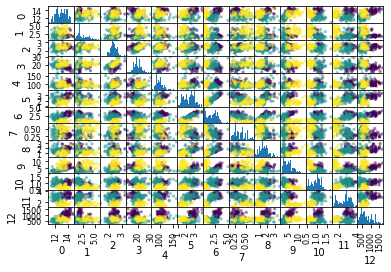

In [46]:

## 데이터 구조 확인
from pandas.plotting import scatter_matrix

wine_df = pd.DataFrame(wine.data, columns=range(len(wine.feature_names)))

scatter_matrix(wine_df, # dataframe

                  c=wine.target, # color

                  hist_kwds={'bins':30}, # hist kwords

                  s=10, # size

                  alpha=0.5, # alpha

                  marker='o') # marker

plt.show()

In [0]:
from sklearn.model_selection import train_test_split
## test size를 0.3으로 가정
x_train, x_test, y_train, y_test = model_selection.train_test_split(wine.data, wine.target, test_size=0.3)

## 전처리 전 데이터를 KNN 모델에 적용 

In [50]:
## K=5 일 때 KNN 알고리즘을 돌릴 때
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=5) 

knn_model1=knn.fit(x_train, y_train)

y_predict = knn_model1.predict(x_train)
score = metrics.accuracy_score(y_train,y_predict)
print(score)

y_predict=knn_model1.predict(x_test)
score = metrics.accuracy_score(y_test,y_predict)
print(score)

print('{:.3f}'.format(knn_model1.score(x_test, y_test)))



0.7903225806451613
0.6851851851851852
0.685


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_true, y_pred = y_test, knn_model1.predict(x_test)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

[[14  0  0]
 [ 3 15  5]
 [ 4  5  8]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.75      0.65      0.70        23
           2       0.62      0.47      0.53        17

    accuracy                           0.69        54
   macro avg       0.68      0.71      0.68        54
weighted avg       0.69      0.69      0.67        54

0.6851851851851852


## 전 처리후 Hyper- parameter tuning 후 KNN 측정

In [53]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from mglearn.plots import plot_2d_separator
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split



wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## 데이터 전처리

wine_df = load_wine()
Data, target = wine_df.data, wine_df.target

Data = preprocessing.MinMaxScaler().fit_transform(Data)


D_train, D_test, t_train, t_test = train_test_split(Data, target, test_size = 0.3)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
## Hyper - parameter 찾기 위한 cv_method 정의

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3)

In [0]:
model_KNN = KNeighborsClassifier()
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
## KNN에 optimal parameter 찾기
gs_KNN = GridSearchCV(estimator=model_KNN, 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=10, 
                      scoring='accuracy',
                      return_train_score=True)


In [60]:
gs_KNN.fit(D_train, t_train);
## 찾은 optimal parameter를 training data에 적용

Fitting 15 folds for each of 21 candidates, totalling 315 fits
[CV] n_neighbors=1, p=1 ..............................................
[CV]  n_neighbors=1, p=1, score=(train=1.000, test=0.960), total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV]  n_neighbors=1, p=1, score=(train=1.000, test=1.000), total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV]  n_neighbors=1, p=1, score=(train=1.000, test=1.000), total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV]  n_neighbors=1, p=1, score=(train=1.000, test=0.960), total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV]  n_neighbors=1, p=1, score=(train=1.000, test=0.958), total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV]  n_neighbors=1, p=1, score=(train=1.000, test=1.000), total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  n_neighbors=1, p=5, score=(train=1.000, test=1.000), total=   0.0s
[CV] n_neighbors=1, p=5 ..............................................
[CV]  n_neighbors=1, p=5, score=(train=1.000, test=1.000), total=   0.0s
[CV] n_neighbors=1, p=5 ..............................................
[CV]  n_neighbors=1, p=5, score=(train=1.000, test=1.000), total=   0.0s
[CV] n_neighbors=1, p=5 ..............................................
[CV]  n_neighbors=1, p=5, score=(train=1.000, test=0.960), total=   0.0s
[CV] n_neighbors=1, p=5 ..............................................
[CV]  n_neighbors=1, p=5, score=(train=1.000, test=0.917), total=   0.0s
[CV] n_neighbors=1, p=5 ..............................................
[CV]  n_neighbors=1, p=5, score=(train=1.000, test=1.000), total=   0.0s
[CV] n_neighbors=1, p=5 ..............................................
[CV]  n_neighbors=1, p=5, score=(train=1.000, test=1.000), total=   0.0s
[CV] n_neighbors=1, p=5 .......................................

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    2.9s finished


In [0]:
t_pred = gs_KNN.predict(D_test)


In [63]:
from sklearn import metrics
metrics.accuracy_score(t_test, t_pred)


0.9259259259259259

In [64]:
metrics.confusion_matrix(t_test, t_pred)


array([[19,  0,  0],
       [ 2, 21,  2],
       [ 0,  0, 10]])

In [65]:
print(metrics.classification_report(t_test, t_pred))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.84      0.91        25
           2       0.83      1.00      0.91        10

    accuracy                           0.93        54
   macro avg       0.91      0.95      0.92        54
weighted avg       0.94      0.93      0.93        54



In [131]:
## ROC curve 를 통한 AUC score 구하기
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

b1=multiclass_roc_auc_score(t_test,t_pred)
b2=(0.95+0.91+0.91)/3
b3=accuracy_score(t_test, t_pred)

## KNN model의 accuracy, f1- score, auc score 나타낸 결과
print('KNN model roc curve score :' ,b1)
print('KNN model f1-score :' ,b2)
print('KNN model accuracy :' ,b3)


KNN model roc curve score : 0.9562337662337663
KNN model f1-score : 0.9233333333333333
KNN model accuracy : 0.9259259259259259



이웃의 수를 증가시켜도 예측 정확도는 많이 늘어나지는 않는다.

따라서 이 데이터에는 k-NN 최근접 algorithm이 적합하지 않음을 알 수 있다.

##3. Decision Tree

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [139]:
wine_df= load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

display(df.head())

X = df.drop('Class label', 1)
y = df['Class label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#전처리
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Training data points: 124
#Testing data points: 54
Class labels: [1 2 3]


In [141]:
## Hyper-parameter인 optimal depth 찾아내기

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint



parameters = {'max_depth':range(2,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9356666666666665 {'max_depth': 7}


train_set의 score가 낮아진 것으로 보아 overfitting은 감소한 것처럼 보이지만, test set의 score또한 낮아졌으므로 이 데이터셋에 tree model은 적합하지 않음을 알 수 있습니다.



In [142]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       0.90      0.95      0.92        19
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54

[[19  1  0]
 [ 1 18  0]
 [ 0  1 14]]


In [144]:
## ROC curve 를 통한 AUC score 구하기
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

c1=multiclass_roc_auc_score(y_test,y_pred)
c2=(0.95+0.92+0.97)/3
c3=accuracy_score(y_test, y_pred)

## Decision Tree model의 accuracy, f1- score, auc score 나타낸 결과
print('Decision Tree model roc curve score :' ,c1)
print('Decision Tree model f1-score :' ,c2)
print('Decision Tree model accuracy :' ,c3)


Decision Tree model roc curve score : 0.9573578554228709
Decision Tree model f1-score : 0.9466666666666667
Decision Tree model accuracy : 0.9444444444444444


##4. Random Forest

decision tree처럼 random foreset도 feature importances를 제공한다.

일반적으로 random forest의 feature importances가 하나의 tree에서 제공하는 것보다 더 신뢰할 만하다.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_wine 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix  
from sklearn.metrics import classification_report 

In [120]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 초기 데이터 Model에 적용

In [118]:
R_train, R_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
model = RandomForestClassifier(random_state=0) # 분류 트리(default) 객체 생성
model.fit(X=R_train, y=y_train)
score_r = model.score(R_test,y_test)

print("Random Forest:{}".format(score_r))

Random Forest:0.9444444444444444


## 전처리와 optimal parameter 적용 후 model 성능

In [121]:
#데이터 전 처리
X, y = load_wine(return_X_y = True)
X.shape # (178, 13)
y.shape # (178,)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [0]:
R_train, R_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


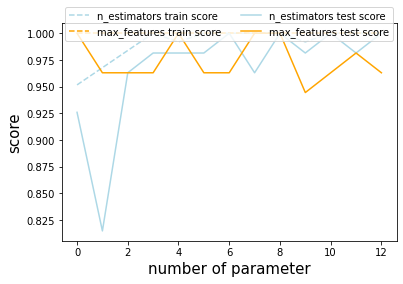

In [123]:
from sklearn.datasets import load_wine



wine = load_wine()



#x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=0)



n_feature = wine.data.shape[1]



score_n_tr_est = []

score_n_te_est = []

score_m_tr_mft = []

score_m_te_mft = []



for i in np.arange(1, n_feature+1): # n_estimators와 mat_features는 모두 0보다 큰 정수여야 하므로 1부터 시작합니다.

    params_n = {'n_estimators':i, 'max_features':'auto', 'n_jobs':-1} # **kwargs parameter

    params_m = {'n_estimators':10, 'max_features':i, 'n_jobs':-1}



    forest_n = RandomForestClassifier(**params_n).fit(R_train, y_train)

    forest_m = RandomForestClassifier(**params_m).fit(R_train, y_train)

    

    score_n_tr = forest_n.score(R_train, y_train)

    score_n_te = forest_n.score(R_test, y_test)

    score_m_tr = forest_m.score(R_train, y_train)

    score_m_te = forest_m.score(R_test, y_test)



    score_n_tr_est.append(score_n_tr)

    score_n_te_est.append(score_n_te)

    score_m_tr_mft.append(score_m_tr)

    score_m_te_mft.append(score_m_te)



index = np.arange(len(score_n_tr_est))

plt.plot(index, score_n_tr_est, label='n_estimators train score', color='lightblue', ls='--') # ls: linestyle

plt.plot(index, score_m_tr_mft, label='max_features train score', color='orange', ls='--')

plt.plot(index, score_n_te_est, label='n_estimators test score', color='lightblue')

plt.plot(index, score_m_te_mft, label='max_features test score', color='orange')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),

           ncol=2, fancybox=True, shadow=False) # fancybox: 박스모양, shadow: 그림자

plt.xlabel('number of parameter', size=15)

plt.ylabel('score', size=15)

plt.show()

parameter의 갯수가 6~8개 일 때 성능이 더 좋아 보인다.



## optimal parameter를 구하고 적용하기




In [124]:
from sklearn.model_selection import cross_val_score
from sklearn import tree


parameters = {'n_estimators':range(3,51)}
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1)
clf.fit(X=R_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9836666666666666 {'n_estimators': 25}


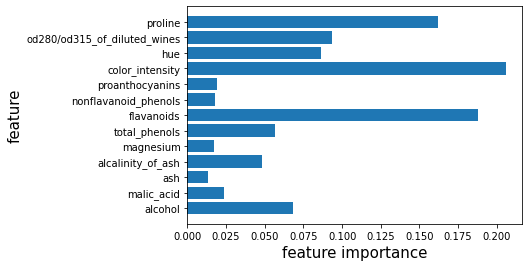

In [125]:
## Random Forest를 통한 feature importance한 feature 찾기
import numpy as np
import matplotlib.pyplot as plt

n_feature = wine.data.shape[1]

index = np.arange(n_feature)


plt.barh(index, clf.best_estimator_.feature_importances_, align='center')

plt.yticks(index, wine.feature_names)

plt.ylim(-1, n_feature)

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

 random forest에서는 'color_intensity'를 가장 중요한 요소로 판단

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


predicted = clf.predict(R_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.981


In [127]:
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[21  1  0]
 [ 0 18  0]
 [ 0  0 14]]


In [130]:
## ROC curve 를 통한 AUC score 구하기
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

d1=multiclass_roc_auc_score(y_test,predicted)
d2=(0.98+0.97+1.0)/3
d3=accuracy_score(y_test, predicted)

## Random Forest의 accuracy, f1- score, auc score 나타낸 결과
print('Random Forest model roc curve score :' ,d1)
print('Random Forest model f1-score :' ,d2)
print('Random Forest model accuracy :' ,d3)


Random Forest model roc curve score : 0.9877946127946128
Random Forest model f1-score : 0.9833333333333334
Random Forest model accuracy : 0.9814814814814815


In [7]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=3e89bf365ad617a03666dc011474804c544694def2c4e5a8d715ecf18b7fd315
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


Wine data는 SVM model이 제일 적합함을 알 수 있다.

In [145]:
print('SVM model roc curve score :' ,a1)
print('KNN model roc curve score :' ,b1)
print('Decision Tree model roc curve score :' ,c1)
print('Random Forest model roc curve score : ' ,d1)


print('\nSVM model f1-score :' ,a2)
print('KNN model f1-score :' ,b2)
print('Decision Tree model f1-score :' ,c2)
print('Random Forest model f1-score :' ,d2)

print('\nSVM model accuracy :' ,a3)
print('KNN model accuracy :' ,b3)
print('Decision Tree model accuracy :' ,c3)
print('Random Forest model accuracy :' ,d3)

SVM model roc curve score : 0.9877946127946128
KNN model roc curve score : 0.9562337662337663
Decision Tree model roc curve score : 0.9573578554228709
Random Forest model roc curve score :  0.9877946127946128

SVM model f1-score : 0.9833333333333334
KNN model f1-score : 0.9233333333333333
Decision Tree model f1-score : 0.9466666666666667
Random Forest model f1-score : 0.9833333333333334

SVM model accuracy : 0.9814814814814815
KNN model accuracy : 0.9259259259259259
Decision Tree model accuracy : 0.9444444444444444
Random Forest model accuracy : 0.9814814814814815
